# Задание
Реализовать задачу расчета распространения тепла в
изолированной среде с помощью численного решения
уравнения Лапласа.

In [80]:
import numpy as np
t = 2
dt = 0.2
n = [32, 128, 512, 1024, 2048]
def_temp = 20.0
hot_temp = 5600.0

## на «чистом» Python

In [71]:
def laplace(t, dt, n, def_temp, hot_temp):
    X = [[def_temp]*(n+2) for i in range(n+2)]
    hot_point = int(n/2)+1
    X[hot_point][hot_point] = hot_temp

    iterations_num = int(t/dt)
    for iteration in range(iterations_num):
        for i in range(1, n+1):
            for j in range(1, n+1):
                X[i][j] = 1/4 * (X[i-1][j] + X[i][j+1] + X[i+1][j] + X[i][j-1])
    return [row[1:n+1] for row in X[1:n+1]]

In [72]:
%%timeit
laplace(t, dt, n[0], def_temp, hot_temp)

2.49 ms ± 155 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [73]:
%%timeit
laplace(t, dt, n[1], def_temp, hot_temp)

39.7 ms ± 1.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [74]:
%%timeit
laplace(t, dt, n[2], def_temp, hot_temp)

684 ms ± 22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [75]:
%%timeit
laplace(t, dt, n[3], def_temp, hot_temp)

2.8 s ± 103 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [76]:
%%timeit
laplace(t, dt, n[4], def_temp, hot_temp)

12 s ± 225 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## с помощью NumPy

In [47]:
def laplace_np(t, dt, n, def_temp, hot_temp):
    X = np.full((n+2,n+2), def_temp)
    hot_point = int(n/2)+1
    X[hot_point][hot_point] = hot_temp
    
    for iteration in np.arange(0, t, dt):
        X[1:n+1, 1:n+1] = np.mean(np.array([X[:-2, 1:n+1], X[1:n+1, 2:],X[2:, 1:n+1],X[1:n+1,:-2]]))
        
    return X[1:n+1, 1:n+1]

In [60]:
%%timeit
laplace_np(t, dt, n[0], def_temp, hot_temp)

163 µs ± 8.1 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [61]:
%%timeit
laplace_np(t, dt, n[1], def_temp, hot_temp)

593 µs ± 24.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [62]:
%%timeit
laplace_np(t, dt, n[2], def_temp, hot_temp)

16.2 ms ± 3.11 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [63]:
%%timeit
laplace_np(t, dt, n[3], def_temp, hot_temp)

133 ms ± 13.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [64]:
%%timeit
laplace_np(t, dt, n[4], def_temp, hot_temp)

480 ms ± 43.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## с помощью CuPy

In [65]:
import cupy

def laplace_cupy(t, dt, n, def_temp, hot_temp):
    X = cupy.full((n+2,n+2), def_temp)
    hot_point = int(n/2)+1
    X[hot_point][hot_point] = hot_temp
    
    for iteration in cupy.arange(0, t, dt):
        X[1:n+1, 1:n+1] = cupy.mean(cupy.array([X[:-2, 1:n+1], X[1:n+1, 2:],X[2:, 1:n+1],X[1:n+1,:-2]]))
    return X[1:n+1, 1:n+1]

In [66]:
%%timeit
laplace_cupy(t, dt, n[0], def_temp, hot_temp)

1.02 ms ± 58.3 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [67]:
%%timeit
laplace_cupy(t, dt, n[1], def_temp, hot_temp)

1.03 ms ± 50.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [68]:
%%timeit
laplace_cupy(t, dt, n[2], def_temp, hot_temp)

6.99 ms ± 223 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [69]:
%%timeit
laplace_cupy(t, dt, n[3], def_temp, hot_temp)

27.7 ms ± 801 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [70]:
%%timeit
laplace_cupy(t, dt, n[4], def_temp, hot_temp)

108 ms ± 17.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Сравнение времени работы

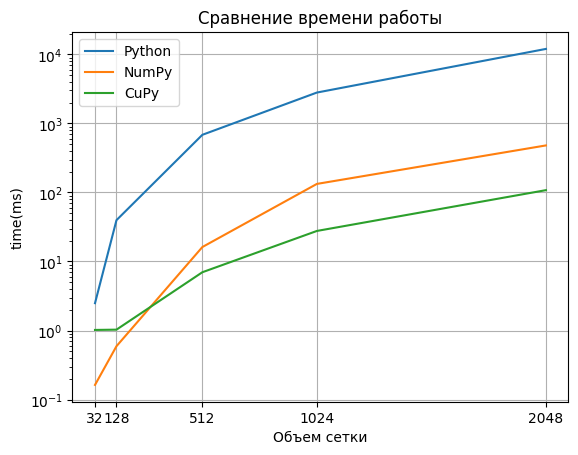

In [90]:
import matplotlib.pyplot as plt

python_times = [2.49, 39.7, 684.0, 2800.0, 12000.0]
np_times = [0.163, 0.593, 16.2, 133.0, 480.0]
cupy_times = [1.02, 1.03, 6.99, 27.7, 108.0]

plt.plot(n, python_times)
plt.plot(n, np_times)
plt.plot(n, cupy_times)
plt.title("Сравнение времени работы")
plt.xlabel("Объем сетки")
plt.ylabel("time(ms)")
plt.grid(True)
plt.legend(['Python', 'NumPy', 'CuPy'])
plt.xticks(n)
plt.yscale('log')

## Вывод
Реализация алгоритма на "чистом" Python является не оптимизированной и выполняется за длительное время.

Реализация алгоритма с использованием NumPy показывает хорошие результаты при низкой размерности сетки.

При увеличении размерности сетки, реализация алгоритма с использованием CuPy позволяет значительно сократить время выполнения за счет использования GPU.